In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

from scipy.stats import iqr

import os

In [2]:
from lib.success_rate_N_estimation import get_N_success_rate, get_rho
from lib.exponential_fitting import fit_exponential_n, show_elbow_n
from lib.tools import filter_n, filter_r
from lib.projected_kernel import densities_2_kernel

In [3]:
m=208

# FQ

## Kernel entries

In [4]:
path_2_k = 'results/sonar/linear/'

files_k = []
for file in os.listdir(path_2_k):
    if file.endswith('.csv'):
        files_k.append(os.path.join(path_2_k, file))
files_k.sort()

In [5]:
k_ZZ = []
for f in files_k:
    k_ZZ.append(pd.read_csv(f, header=None).to_numpy())
k_ZZ = np.array(k_ZZ)

In [6]:
n_range = np.arange(2,k_ZZ[0].shape[0]+2, 1)
n_range_FQ = np.arange(2,k_ZZ[0].shape[0]+2, 1)

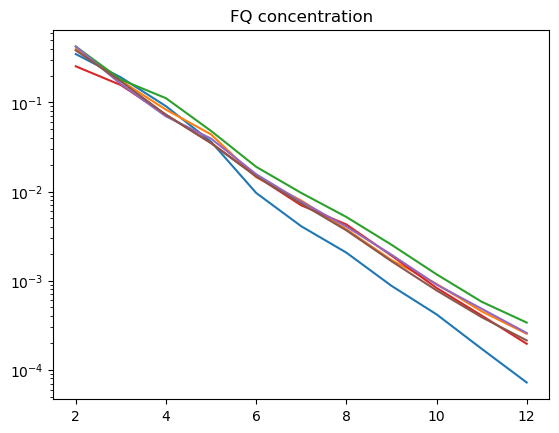

In [7]:
plt.plot(n_range,np.median(k_ZZ,axis=2).T)
plt.yscale('log')
plt.title('FQ concentration')
plt.show()

In [8]:
best_qubits = [2, 2, 7, 9, 6, 6]
fits_kappa = np.empty((np.median(k_ZZ,axis=2).shape[0],2))

for i in range(np.median(k_ZZ,axis=2).shape[0]):
    #show_elbow_n(Ns_ZZ[i], best_qubit=best_qubits[i])
    fits_kappa[i,0], fits_kappa[i,1] = fit_exponential_n(np.median(k_ZZ[i],axis=1), best_qubit=best_qubits[i], show_plot=False)

print(fits_kappa)

[[-1.25367831  2.29461957]
 [-1.0746387   1.58520772]
 [-0.99255777  1.21084257]
 [-1.08858132  1.64465162]
 [-0.99664029  0.97877125]
 [-1.03719938  1.103077  ]]


In [9]:
n_extrapolation_max = 100
n_extrapolation = np.arange(n_range[-1], n_extrapolation_max+0.1,1)
n_extrapolation_FQ = np.arange(n_range[-1], n_extrapolation_max+0.1,1)

kappa_extrapolation = np.array([fits_kappa[i,1]*np.power(2, fits_kappa[i,0]*n_extrapolation) for i in range(np.median(k_ZZ,axis=2).shape[0])])
kappa_ZZ = np.median(k_ZZ,axis=2)

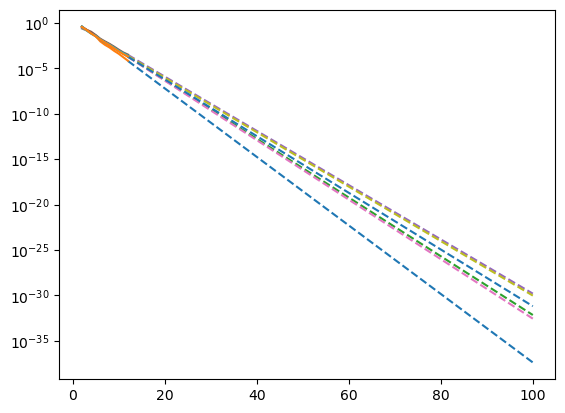

In [10]:
for i in range(kappa_extrapolation.shape[0]):
    plt.plot(n_extrapolation, kappa_extrapolation[i], linestyle='dashed')
    plt.plot(n_range, kappa_ZZ[i])
plt.yscale('log')
plt.show()

## Success rate

In [11]:
P_SR = 0.99

In [12]:
def N_SR(kappa,P_SR):
    return(np.log(1-P_SR)/np.log(1-kappa))

In [13]:
NSRs_ZZ_FQ = np.log(1-P_SR)/np.log(1-np.median(k_ZZ,axis=2))

In [14]:
best_qubits = [2,2,7,9,6,6]
fits_N_SR_FQ = np.empty((np.median(k_ZZ,axis=2).shape[0],2))

for i in range(np.median(k_ZZ,axis=2).shape[0]):
    #show_elbow_n(Ns_ZZ[i], best_qubit=best_qubits[i])
    fits_N_SR_FQ[i,0], fits_N_SR_FQ[i,1] = fit_exponential_n(NSRs_ZZ_FQ[i], best_qubit=best_qubits[i], show_plot=False)

print(fits_N_SR_FQ)

[[1.2750547  1.74698285]
 [1.09768391 2.50143489]
 [0.9938343  3.76531344]
 [1.08898306 2.79074659]
 [0.99829229 4.64646536]
 [1.03876444 4.12574738]]


In [15]:
n_extrapolation_max = 100
n_extrapolation = np.arange(n_range[-1], n_extrapolation_max+0.1,1)

NSRs_extrapolation_FQ = np.array([fits_N_SR_FQ[i,1]*np.power(2, fits_N_SR_FQ[i,0]*n_extrapolation) for i in range(fits_N_SR_FQ.shape[0])])

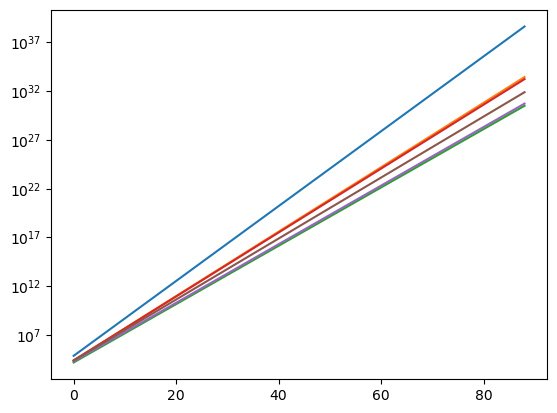

In [16]:
plt.plot(NSRs_extrapolation_FQ.T)
plt.yscale('log')

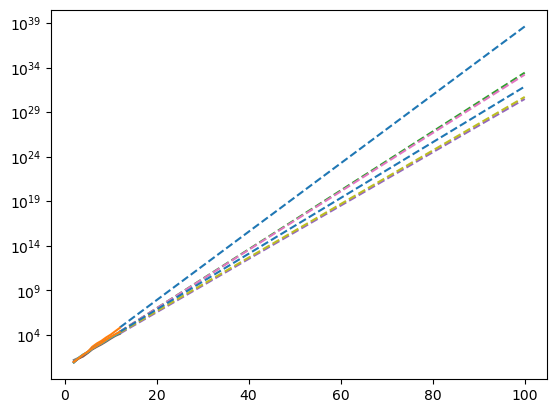

In [17]:
for i in range(NSRs_extrapolation_FQ.shape[0]):
    plt.plot(n_extrapolation, NSRs_extrapolation_FQ[i], linestyle='dashed')
    plt.plot(n_range, NSRs_ZZ_FQ[i])
plt.yscale('log')
plt.show()

## Spread

In [18]:
from lib.tools import filter_n, filter_r
from lib.spread_N_estimation import V_k, N_spread

In [19]:
P_spread = 0.99

### Delta_ensemble

In [20]:
k_IQRS = iqr(k_ZZ, axis=2)

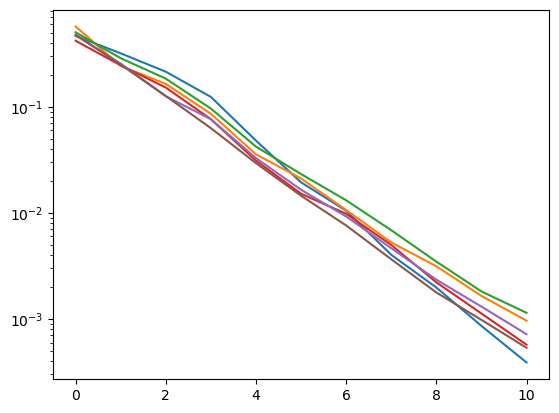

In [21]:
plt.plot(k_IQRS.T)
plt.yscale('log')

In [22]:
best_qubits = [6,2,7,6,6,6]
fits_Delta_ensemble = np.empty((k_IQRS.shape[0],2))

for i in range(k_IQRS.shape[0]):
    #show_elbow_n(Ns_ZZ[i], best_qubit=best_qubits[i])
    fits_Delta_ensemble[i,0], fits_Delta_ensemble[i,1] = fit_exponential_n(k_IQRS[i], best_qubit=best_qubits[i], show_plot=False)

print(fits_Delta_ensemble)

[[-1.15083568  5.60577445]
 [-0.92488474  1.89336874]
 [-0.89287291  1.77777839]
 [-0.96170197  1.78119601]
 [-0.92242865  1.48636979]
 [-0.97142295  1.62038871]]


In [23]:
n_extrapolation_max = 100
n_extrapolation = np.arange(n_range[-1], n_extrapolation_max+0.1,1)

Delta_extrapolation = np.array([fits_Delta_ensemble[i,1]*np.power(2, fits_Delta_ensemble[i,0]*n_extrapolation) for i in range(k_IQRS.shape[0])])

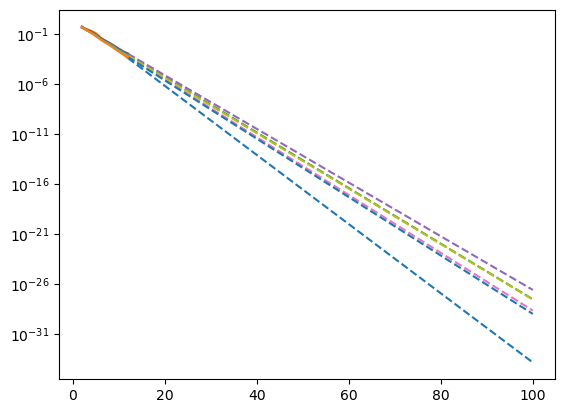

In [24]:
for i in range(Delta_extrapolation.shape[0]):
    plt.plot(n_extrapolation, Delta_extrapolation[i], linestyle='dashed')
    plt.plot(n_range, k_IQRS[i])
plt.yscale('log')
plt.show()

## N_spread

In [25]:
def N_spread(kappa, Delta, P_spread, epsilon=1):
    return((kappa*(1-kappa))/((1-P_spread)*np.power(epsilon*Delta,2)))

In [26]:
Ns_spread_FQ = np.empty(kappa_ZZ.shape)

for i in range(kappa_ZZ.shape[0]):
    kappa = kappa_ZZ[i]
    Delta = k_IQRS[i]
    Ns_spread_FQ[i] = N_spread(kappa, Delta, P_spread)

In [27]:
best_qubits = [2,2,7,6,6,6]
fits_N_spread_FQ = np.empty((Ns_spread_FQ.shape[0],2))

for i in range(Ns_spread_FQ.shape[0]):
    #show_elbow_n(Ns_ZZ[i], best_qubit=best_qubits[i])
    fits_N_spread_FQ[i,0], fits_N_spread_FQ[i,1] = fit_exponential_n(Ns_spread_FQ[i], best_qubit=best_qubits[i], show_plot=False)

print(fits_N_spread_FQ)

[[ 0.92784535 15.34257625]
 [ 0.8227891  32.46296683]
 [ 0.79574303 37.55021864]
 [ 0.87918428 37.65728119]
 [ 0.85152479 43.20479589]
 [ 0.90878003 41.02818687]]


In [28]:
Ns_spread_extrapolated_FQ = np.empty((Ns_spread_FQ.shape[0], n_extrapolation.shape[0]))

for ZZ_id, _ in enumerate(Ns_spread_FQ):
    for n_id, _ in enumerate(n_extrapolation):
        n = n_extrapolation[n_id]
        kappa_ext = kappa_extrapolation[ZZ_id,n_id]
        Delta_ext = Delta_extrapolation[ZZ_id,n_id]
        Ns_spread_extrapolated_FQ[ZZ_id, n_id] = N_spread(kappa_ext,Delta_ext, P_spread) 

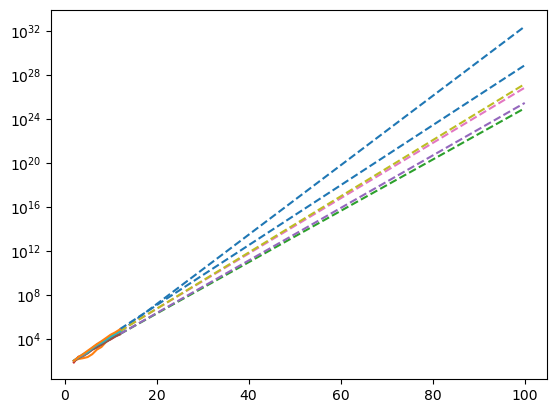

In [29]:
for i in range(Ns_spread_extrapolated_FQ.shape[0]):
    plt.plot(n_extrapolation, Ns_spread_extrapolated_FQ[i], linestyle='dashed')
    plt.plot(n_range, Ns_spread_FQ[i])
plt.yscale('log')
plt.show()

# PQ

## Kernel entries

In [30]:
path_2_k = 'results/sonar/projected_entries/full'

files_k = []
for file in os.listdir(path_2_k):
    if file.endswith('.csv'):
        files_k.append(os.path.join(path_2_k, file))
files_k.sort()

In [31]:
k_ZZ = []
for f in files_k:
    k_ZZ.append(pd.read_csv(f, header=None).to_numpy())
k_ZZ = np.array(k_ZZ)

In [32]:
n_range = np.arange(2,k_ZZ[0].shape[0]+2, 1)
n_range_PQ = np.arange(2,k_ZZ[0].shape[0]+2, 1)

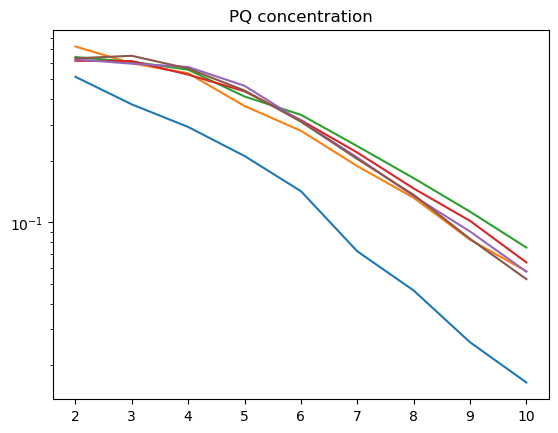

In [33]:
plt.plot(n_range,1-np.median(k_ZZ,axis=2).T)
plt.yscale('log')
plt.title('PQ concentration')
plt.show()

## RMDS

In [34]:
path_2_rdms = 'results/sonar/reduced_density_matrices/full/'

files_rmds = []
for file in os.listdir(path_2_rdms):
    if file.endswith('.npy'):
        files_rmds.append(os.path.join(path_2_rdms, file))
files_rmds.sort()

In [35]:
ZZ_values = np.array([int(f[-5:-4]) for f in files_rmds])
ZZ_values = np.sort(np.unique(ZZ_values))

#n_values = []
#for ZZ in ZZ_values:
#    files_ZZ_n = filter_r(r=ZZ, files=files_rmds)
#    n_vals_ZZ = np.array([int(f[-11:-9]) for f in files_ZZ_n])
#    n_vals_ZZ = np.sort(np.unique(n_vals_ZZ))
#    n_values.append(n_vals_ZZ)

n_values = np.arange(2,10+0.1,1, dtype=int)

## Success rate

In [36]:
P_SR = 0.99
mu = 0.5

In [37]:
NSRs_ZZ_PQ = []
for k in k_ZZ:
    epsilon_limits = get_rho(k, n_range=n_range)
    Ns = [get_N_success_rate(P_SR, mu, mu-epsilon_limit) for epsilon_limit in epsilon_limits]
    NSRs_ZZ_PQ.append(Ns)

NSRs_ZZ_PQ = np.array(NSRs_ZZ_PQ)


In [38]:
best_qubits = [7,5,7,5,4,3]
fits_N_SR_PQ = np.empty((NSRs_ZZ_PQ.shape[0],2))

for i in range(NSRs_ZZ_PQ.shape[0]):
    #show_elbow_n(Ns_ZZ[i], best_qubit=best_qubits[i])
    fits_N_SR_PQ[i,0], fits_N_SR_PQ[i,1] = fit_exponential_n(NSRs_ZZ_PQ[i], best_qubit=best_qubits[i], show_plot=False)

print(fits_N_SR_PQ)

[[ 0.89235576 10.5453559 ]
 [ 0.78583903  6.43673182]
 [ 0.73065027  6.85085018]
 [ 0.79819189  5.11267349]
 [ 0.83818896  4.45932532]
 [ 0.86160653  4.08430422]]


In [39]:
n_extrapolation_max = 100
n_extrapolation = np.arange(n_range[-1], n_extrapolation_max+0.1,1)
n_extrapolation_PQ = np.arange(n_range[-1], n_extrapolation_max+0.1,1)

NSRs_extrapolation_PQ = np.array([fits_N_SR_PQ[i,1]*np.power(2, fits_N_SR_PQ[i,0]*n_extrapolation) for i in range(fits_N_SR_PQ.shape[0])])

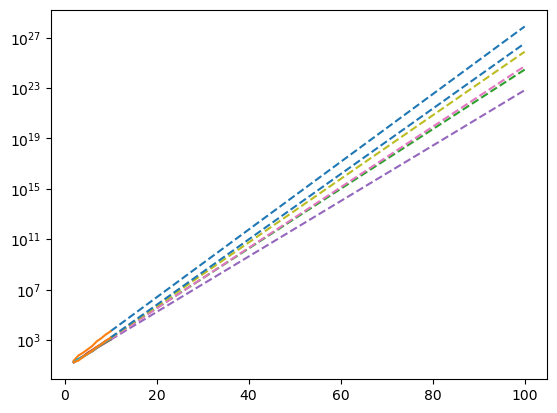

In [40]:
for i in range(NSRs_extrapolation_PQ.shape[0]):
    plt.plot(n_extrapolation, NSRs_extrapolation_PQ[i], linestyle='dashed')
    plt.plot(n_range, NSRs_ZZ_PQ[i])
plt.yscale('log')
plt.show()

## Spread

In [41]:
from lib.tools import filter_n, filter_r
from lib.spread_N_estimation import V_k, V_k_noisy, N_spread

In [42]:
P_spread = 0.99

## V

In [43]:
V_medians_ZZ = []
V_medians_ZZ_noisy = []
for ZZ_id, ZZ in enumerate(ZZ_values):
    print('ZZ: ', ZZ)
    median_Vs_p_n = []
    median_Vs_p_n_noisy = []
    for n_qubits in n_range:
        file = filter_r(r=ZZ, files=files_rmds)
        file = filter_n(n=n_qubits, files=file)[0]

        RM = np.load(file)

        Vs = np.empty((m*(m-1)//2,n_qubits))
        Vs_noisy = np.empty((m*(m-1)//2,n_qubits))
        for k in range(n_qubits):
            index = 0
            for i in range(m):
                for j in range(i):
                    x_dens = RM[i]
                    y_dens = RM[j]
                    Vs[index, k] = V_k(k=k, x_densities=x_dens, y_densities=y_dens)
                    Vs_noisy[index, k] = V_k_noisy(k=k, x_densities=x_dens, y_densities=y_dens)
                    index += 1
        V=Vs.sum(axis=1)
        V_noisy=Vs_noisy.sum(axis=1)
        median_Vs_p_n.append(np.median(V)/n_qubits)
        median_Vs_p_n_noisy.append(np.median(V_noisy)/n_qubits)

    median_Vs_p_n = np.array(median_Vs_p_n)
    median_Vs_p_n_noisy = np.array(median_Vs_p_n_noisy)

    V_medians_ZZ.append(median_Vs_p_n)
    V_medians_ZZ_noisy.append(median_Vs_p_n_noisy)
V_medians_ZZ = np.array(V_medians_ZZ)
V_medians_ZZ_noisy = np.array(V_medians_ZZ_noisy)

ZZ:  1
ZZ:  2
ZZ:  3
ZZ:  4
ZZ:  5
ZZ:  6


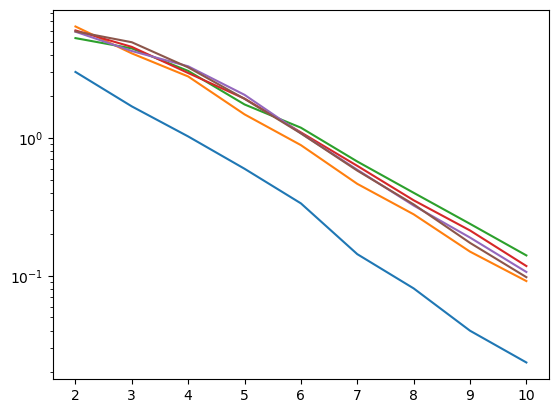

In [44]:
for medians in V_medians_ZZ:
    plt.plot(n_values,medians)
plt.yscale('log')
plt.show()

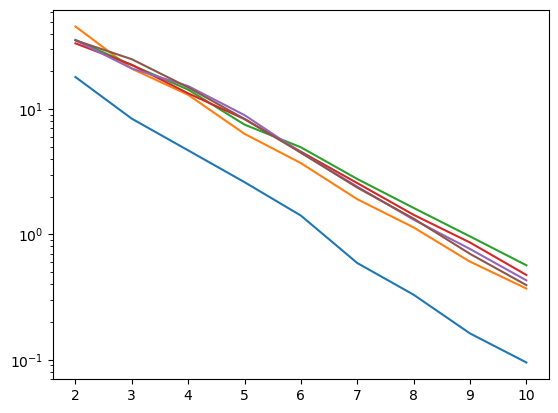

In [45]:
for medians in V_medians_ZZ_noisy:
    plt.plot(n_values,medians)
plt.yscale('log')
plt.show()

In [46]:
best_qubits = [4, 4, 7, 5, 4, 5]
fits_V_p_N = np.empty((V_medians_ZZ.shape[0],2))
fits_V_p_N_noisy = np.empty((V_medians_ZZ_noisy.shape[0],2))

for i in range(V_medians_ZZ.shape[0]):
    #show_elbow_n(Ns_ZZ[i], best_qubit=best_qubits[i])
    fits_V_p_N[i,0], fits_V_p_N[i,1] = fit_exponential_n(V_medians_ZZ[i], best_qubit=best_qubits[i], show_plot=False)
    fits_V_p_N_noisy[i,0], fits_V_p_N_noisy[i,1] = fit_exponential_n(V_medians_ZZ_noisy[i], best_qubit=best_qubits[i], show_plot=False)

print(fits_V_p_N)
print(fits_V_p_N_noisy)

[[-0.93480603 14.57932145]
 [-0.82343854 26.51712633]
 [-0.75310341 26.10329224]
 [-0.80202557 30.88189784]
 [-0.83822288 35.10786654]
 [-0.86260936 38.53555572]]
[[ -0.96441092  70.45322421]
 [ -0.85364323 128.44197305]
 [ -0.76232072 111.6380183 ]
 [ -0.82123829 140.14719777]
 [ -0.8692237  170.50499802]
 [ -0.88294505 175.84063341]]


In [47]:
n_extrapolation_max = 100
n_extrapolation = np.arange(n_range[-1], n_extrapolation_max+0.1,1)

V_extrapolation = np.array([fits_V_p_N[i,1]*np.power(2, fits_V_p_N[i,0]*n_extrapolation) for i in range(V_medians_ZZ.shape[0])])
V_extrapolation_noisy = np.array([fits_V_p_N_noisy[i,1]*np.power(2, fits_V_p_N_noisy[i,0]*n_extrapolation) for i in range(V_medians_ZZ_noisy.shape[0])])

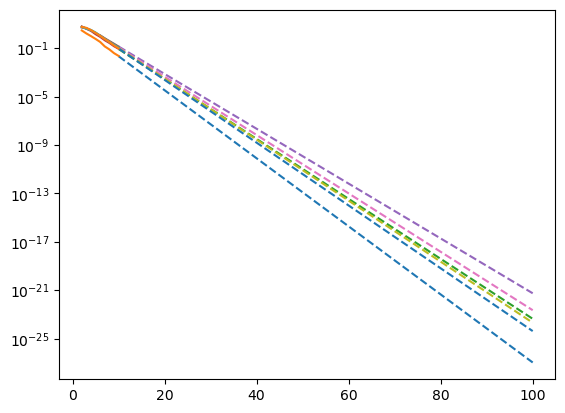

In [48]:
for i in range(V_extrapolation.shape[0]):
    plt.plot(n_extrapolation, V_extrapolation[i], linestyle='dashed')
    plt.plot(n_range, V_medians_ZZ[i])
plt.yscale('log')
plt.show()

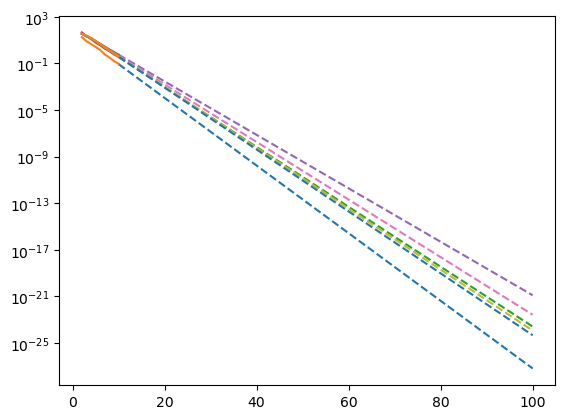

In [49]:
for i in range(V_extrapolation_noisy.shape[0]):
    plt.plot(n_extrapolation, V_extrapolation_noisy[i], linestyle='dashed')
    plt.plot(n_range, V_medians_ZZ_noisy[i])
plt.yscale('log')
plt.show()

## Delta_ensemble

In [50]:
k_IQRS = iqr(k_ZZ, axis=2)

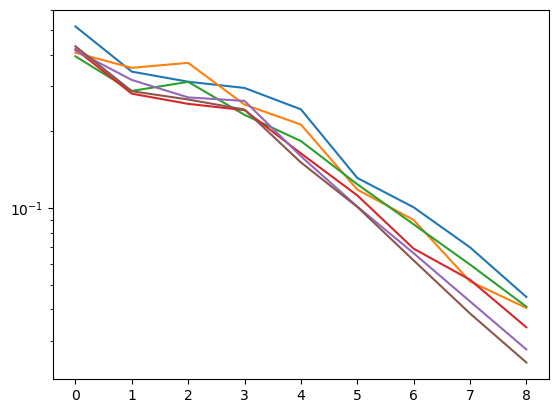

In [51]:
plt.plot(k_IQRS.T)
plt.yscale('log')

In [52]:
best_qubits = [5,4,4,5,5,5]
fits_Delta_ensemble = np.empty((k_IQRS.shape[0],2))

for i in range(k_IQRS.shape[0]):
    #show_elbow_n(Ns_ZZ[i], best_qubit=best_qubits[i])
    fits_Delta_ensemble[i,0], fits_Delta_ensemble[i,1] = fit_exponential_n(k_IQRS[i], best_qubit=best_qubits[i], show_plot=False)

print(fits_Delta_ensemble)

[[-0.55487701  2.14712329]
 [-0.55180396  1.80017837]
 [-0.4925681   1.3046412 ]
 [-0.5659819   1.71437665]
 [-0.64303784  2.36180226]
 [-0.66026879  2.40441912]]


In [53]:
n_extrapolation_max = 100
n_extrapolation = np.arange(n_range[-1], n_extrapolation_max+0.1,1)

Delta_extrapolation = np.array([fits_Delta_ensemble[i,1]*np.power(2, fits_Delta_ensemble[i,0]*n_extrapolation) for i in range(k_IQRS.shape[0])])

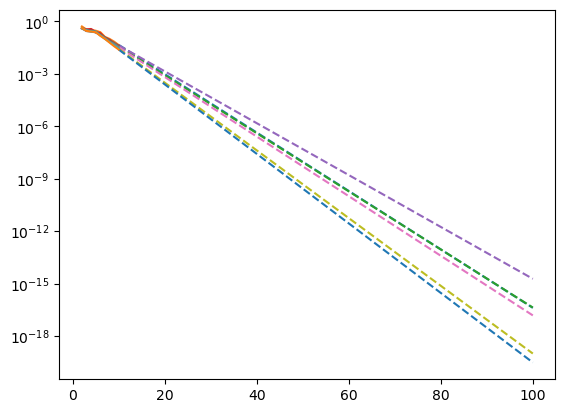

In [54]:
for i in range(Delta_extrapolation.shape[0]):
    plt.plot(n_extrapolation, Delta_extrapolation[i], linestyle='dashed')
    plt.plot(n_range, k_IQRS[i])
plt.yscale('log')
plt.show()

## Kappa

In [55]:
M_kappa = np.median(k_ZZ, axis=2)
M_conc_kappa = 1-M_kappa

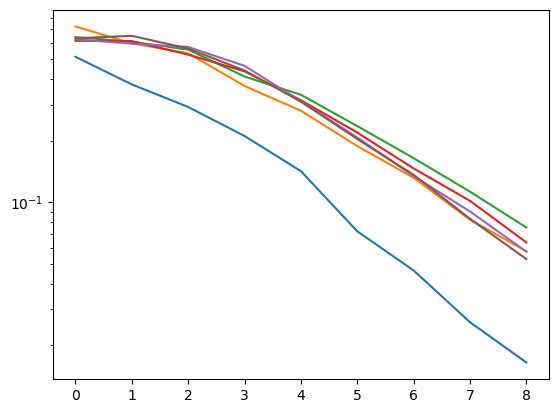

In [56]:
plt.plot(M_conc_kappa.T)
plt.yscale('log')

In [57]:
best_qubits = [5,6,6,5,5,6]

In [58]:
best_qubits = [5,6,6,5,5,6]
fits_M_conc_kappa = np.empty((M_conc_kappa.shape[0],2))

for i in range(M_conc_kappa.shape[0]):
    #show_elbow_n(Ns_ZZ[i], best_qubit=best_qubits[i])
    fits_M_conc_kappa[i,0], fits_M_conc_kappa[i,1] = fit_exponential_n(M_conc_kappa[i], best_qubit=best_qubits[i], show_plot=False)

print(fits_M_conc_kappa)

[[-0.75390634  2.97739989]
 [-0.57575956  3.08897741]
 [-0.53764208  3.1847333 ]
 [-0.5537647   3.11095415]
 [-0.60244224  3.80153595]
 [-0.6411117   4.56225243]]


In [59]:
n_extrapolation_max = 100
n_extrapolation = np.arange(n_range[-1], n_extrapolation_max+0.1,1)

kappa_conc_extrapolation = np.array([fits_M_conc_kappa[i,1]*np.power(2, fits_M_conc_kappa[i,0]*n_extrapolation) for i in range(k_IQRS.shape[0])])

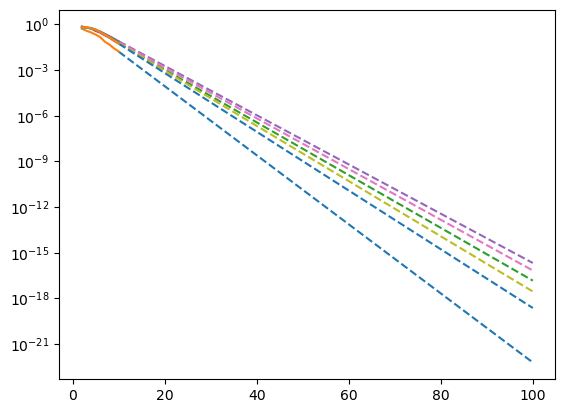

In [60]:
for i in range(kappa_conc_extrapolation.shape[0]):
    plt.plot(n_extrapolation, kappa_conc_extrapolation[i], linestyle='dashed')
    plt.plot(n_range, M_conc_kappa[i])
plt.yscale('log')
plt.show()

In [61]:
kappa_extrapolation = 1-kappa_conc_extrapolation

## N_spread

In [62]:
def N_spread(kappa, Delta_ensemble, V_p_n, n, P_spread=0.99, epsilon=1, gamma=1):
    N = (np.power(n*gamma*kappa,2)*V_p_n)/(np.power(epsilon*Delta_ensemble,2)*(1-P_spread))
    return(N)

In [63]:
i_n = 0
i_ZZ = 0

kappa = M_kappa[i_ZZ, i_n]
Delta = k_IQRS[i_ZZ, i_n]
V_p_n = V_medians_ZZ[i_ZZ,i_n]
V_p_n_noisy = V_medians_ZZ_noisy[i_ZZ,i_n]
n = n_values[i_n]
print(N_spread(kappa,Delta,V_p_n,n))
print(N_spread(kappa,Delta,V_p_n_noisy,n))

1067.7438515486913
6391.5093332055485


In [64]:
Ns_spread_PQ = np.empty((ZZ_values.shape[0], n_values.shape[0]))
Ns_spread_noisy_PQ = np.empty((ZZ_values.shape[0], n_values.shape[0]))

for ZZ_id, _ in enumerate(ZZ_values):
    for n_id, _ in enumerate(n_values):
        kappa = M_kappa[ZZ_id, n_id]
        Delta = k_IQRS[ZZ_id, n_id]
        V_p_n = V_medians_ZZ[ZZ_id,n_id]
        V_p_n_noisy = V_medians_ZZ_noisy[ZZ_id,n_id]
        n = n_values[n_id]
        Ns_spread_PQ[ZZ_id, n_id] = N_spread(kappa,Delta,V_p_n,n)        
        Ns_spread_noisy_PQ[ZZ_id, n_id] = N_spread(kappa,Delta,V_p_n_noisy,n)

In [65]:
Ns_spread_extrapolated_PQ = np.empty((ZZ_values.shape[0], n_extrapolation.shape[0]))
Ns_spread_extrapolated_noisy_PQ = np.empty((ZZ_values.shape[0], n_extrapolation.shape[0]))

for ZZ_id, _ in enumerate(ZZ_values):
    for n_id, _ in enumerate(n_extrapolation):
        n = n_extrapolation[n_id]
        kappa_ext = kappa_extrapolation[ZZ_id,n_id]
        Delta_ext = Delta_extrapolation[ZZ_id,n_id]
        V_p_n_exp = V_extrapolation[ZZ_id,n_id]
        V_p_n_exp_noisy = V_extrapolation_noisy[ZZ_id,n_id]
        Ns_spread_extrapolated_PQ[ZZ_id, n_id] = N_spread(kappa_ext,Delta_ext,V_p_n_exp,n) 
        Ns_spread_extrapolated_noisy_PQ[ZZ_id, n_id] = N_spread(kappa_ext,Delta_ext,V_p_n_exp_noisy,n) 

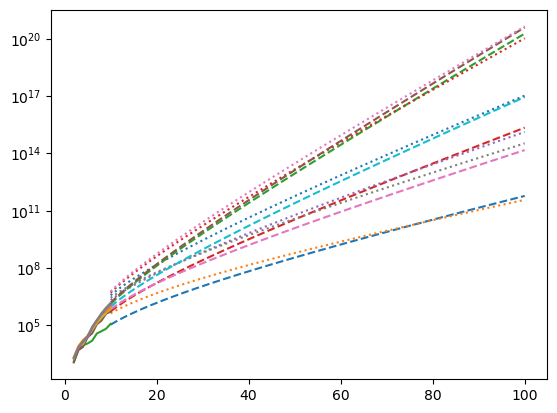

In [66]:
for i in range(Ns_spread_extrapolated_PQ.shape[0]):
    plt.plot(n_extrapolation, Ns_spread_extrapolated_PQ[i], linestyle='dashed')
    plt.plot(n_extrapolation, Ns_spread_extrapolated_noisy_PQ[i], linestyle='dotted')
    plt.plot(n_range, Ns_spread_PQ[i])
plt.yscale('log')
plt.show()

# Together

In [93]:
step = 5
trimm_end = -25

n_ext_plot_FQ = n_extrapolation_FQ[:trimm_end:step]
NSR_ext_plot_FQ = NSRs_extrapolation_FQ[:,:trimm_end:step]
Ns_spread_ext_plot_FQ = Ns_spread_extrapolated_FQ[:,:trimm_end:step]

n_ext_plot_PQ = n_extrapolation_PQ[:trimm_end:step]
NSR_ext_plot_PQ = NSRs_extrapolation_PQ[:,:trimm_end:step]
Ns_spread_ext_plot_PQ = Ns_spread_extrapolated_PQ[:,:trimm_end:step]

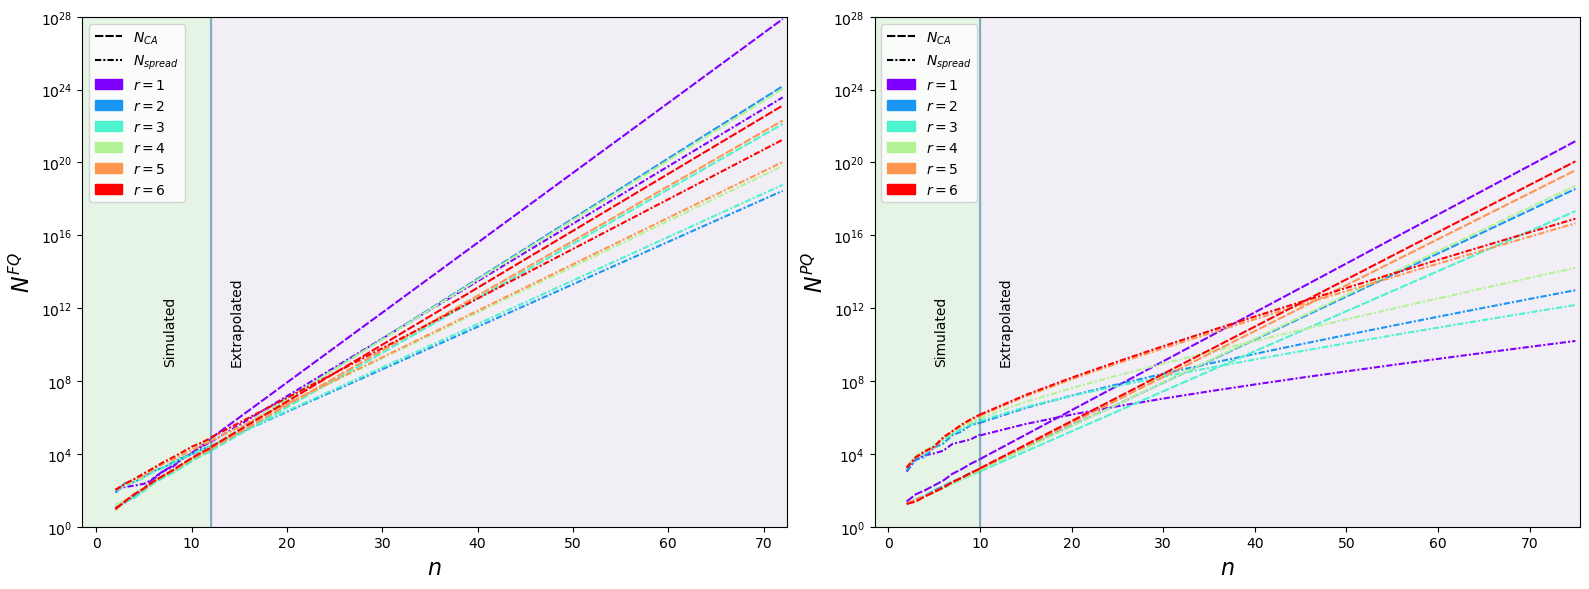

In [111]:
color = cm.rainbow(np.linspace(0, 1, NSRs_extrapolation_FQ.shape[0]))

bg_color = [plt.cm.Accent(i) for i in range(2)]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

legend_entries = []

legend_entries.append(Line2D([], [], color='black', linestyle=(0, (4, 1)), label=r'$N_{CA}}$'))
legend_entries.append(Line2D([], [], color='black', linestyle=(0, (3, 1, 1, 1)), label=r'$N_{spread}}$'))
#legend_entries.append( Line2D([], [], color="white", marker='o', markerfacecolor="black", label=r'$N_{SR}}$'))
#legend_entries.append( Line2D([], [], color="white", marker='s', markerfacecolor="black", label=r'$N_{spread}}$'))

#Left plot
for i, c in enumerate(color):
    ax[0].plot(n_range_FQ,NSRs_ZZ_FQ[i], c=c, linestyle = (0, (4, 1)))
    ax[0].plot(n_ext_plot_FQ, NSR_ext_plot_FQ[i], c=c, linestyle = (0, (4, 1)))
    ax[0].plot(n_range_FQ,Ns_spread_FQ[i], c=c, linestyle = (0, (3, 1, 1, 1)))
    ax[0].plot(n_ext_plot_FQ, Ns_spread_ext_plot_FQ[i], c=c, linestyle = (0, (3, 1, 1, 1)))

    ax[0].axvline(n_range_FQ[-1], alpha=0.1)

    legend_entries.append( mpatches.Patch(color=color[i], label=r'$r =$'+str(i+1)) )

left,right = ax[0].get_xlim()

ax[0].axvspan(-10, n_range_FQ[-1], alpha=0.2, color=bg_color[0])
ax[0].axvspan(n_range_FQ[-1], n_extrapolation_FQ[-1]+10, alpha=0.2, color=bg_color[1])

ax[0].text(n_range_FQ[-1]-5,1.e9,'Simulated', rotation='vertical')
ax[0].text(n_range_FQ[-1]+2,1.e9,'Extrapolated', rotation='vertical')

#Right plot
for i, c in enumerate(color):
    ax[1].plot(n_range_PQ,NSRs_ZZ_PQ[i], c=c, linestyle = (0, (4, 1)))
    ax[1].plot(n_ext_plot_PQ, NSR_ext_plot_PQ[i], c=c, linestyle = (0, (4, 1)))
    ax[1].plot(n_range_PQ,Ns_spread_PQ[i], c=c, linestyle = (0, (3, 1, 1, 1)))
    ax[1].plot(n_ext_plot_PQ, Ns_spread_ext_plot_PQ[i], c=c, linestyle = (0, (3, 1, 1, 1)))

    ax[1].axvline(n_range_PQ[-1], alpha=0.1)

    #legend_entries.append( mpatches.Patch(color=color[i], label=r'$r =$'+str(i+1)) )

ax[1].axvspan(-10, n_range_PQ[-1], alpha=0.2, color=bg_color[0])
ax[1].axvspan(n_range_PQ[-1], n_extrapolation_PQ[-1]+10, alpha=0.2, color=bg_color[1])

ax[1].text(n_range_PQ[-1]-5,1.e9,'Simulated', rotation='vertical')
ax[1].text(n_range_PQ[-1]+2,1.e9,'Extrapolated', rotation='vertical')

#General

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xlim((left,right-3))
ax[0].set_ylim((1,1.e28))
ax[1].set_xlim((left,right))
ax[1].set_ylim((1,1.e28))

ax[1].set_xlabel(r'$n$', fontsize=16)
ax[0].set_xlabel(r'$n$', fontsize=16)
#ax[0].set_xticks([int(i) for i in x_full if i%2==0])
#ax[1].set_xticks([int(i) for i in x_full if i%2==0])
ax[0].set_ylabel(r'$N^{FQ}$', fontsize=16)
ax[1].set_ylabel(r'$N^{PQ}$', fontsize=16)


ax[1].legend(handles=legend_entries, loc='upper left')
ax[0].legend(handles=legend_entries, loc='upper left')
plt.tight_layout()
#plt.savefig('N_comparison.pdf', transparent=True)
plt.show()